In [4]:
import pandas as pd

In [5]:
stock = pd.read_csv("/Users/karishmajoshi/Desktop/AppleCompanyStock.csv")

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    950 non-null    int64  
 1   month   950 non-null    int64  
 2   open    950 non-null    float64
 3   high    950 non-null    float64
 4   low     950 non-null    float64
 5   close   950 non-null    float64
 6   volume  950 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 52.1 KB


In [7]:
stock.head()

,year,month,open,high,low,close,volume
0,2018,3,177.32,177.470,173.66,175.82,46812368
1,2018,3,180.29,183.500,177.62,178.02,151720299
2,2018,3,175.21,180.000,174.27,179.98,138442235
3,2018,3,176.35,180.615,172.45,176.21,196432091
4,2018,2,172.05,175.650,171.01,175.50,133197874


In [8]:
stock.tail()

,year,month,open,high,low,close,volume
945,2000,2,108.00,117.12,105.94,108.75,14859900
946,2000,2,101.00,110.00,94.50,108.00,21289500
947,2000,1,108.44,114.19,100.62,101.62,18470300
948,2000,1,101.00,121.50,100.44,111.31,30213200
949,2000,1,102.00,102.25,86.50,100.44,29872700


In [9]:
stock.describe()

,year,month,open,high,low,close,volume
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,9.500000e+02
mean,2008.631579,6.497895,168.952003,174.218120,164.176523,169.350997,1.092915e+08
std,5.259449,3.463112,167.253584,171.648176,163.694731,167.548177,8.144325e+07
min,2000.000000,1.000000,13.130000,13.630000,12.720000,13.120000,5.515100e+06
25%,2004.000000,3.000000,46.232500,48.335000,44.840000,46.130000,4.347195e+07
50%,2009.000000,6.500000,111.405000,114.735000,108.230000,111.940000,9.234840e+07
75%,2013.000000,9.750000,195.610000,202.487500,190.272500,195.240000,1.511180e+08
max,2018.000000,12.000000,699.350000,705.070000,693.620000,700.095000,5.003630e+08


In [10]:
stock = stock.loc[:,["year", "month", "close", "volume"]]
stock.head()

,year,month,close,volume
0,2018,3,175.82,46812368
1,2018,3,178.02,151720299
2,2018,3,179.98,138442235
3,2018,3,176.21,196432091
4,2018,2,175.50,133197874


In [11]:
import numpy as np

In [12]:
stock_agg = stock.groupby(["year","month"]).tail(1)
stock_agg.head()

,year,month,close,volume
3,2018,3,176.21,196432091
7,2018,2,160.50,248091289
11,2018,1,175.00,99095223
16,2017,12,171.05,166555527
20,2017,11,172.50,203892677


In [13]:
stock_agg = stock_agg.sort_values(by=["year", "month"],ascending=True).reset_index()
stock_agg.drop(axis=1,columns='index',inplace=True)
stock_agg.head()

,year,month,close,volume
0,2000,1,100.44,29872700
1,2000,2,108.00,21289500
2,2000,3,128.00,21508200
3,2000,4,131.75,17398400
4,2000,5,113.12,14607300


In [14]:
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('ggplot')

In [15]:
stock_agg["yrmo"] = stock_agg["year"].map(str)+stock_agg["month"].map(str)

In [16]:
stock_agg.head()

,year,month,close,volume,yrmo
0,2000,1,100.44,29872700,20001
1,2000,2,108.00,21289500,20002
2,2000,3,128.00,21508200,20003
3,2000,4,131.75,17398400,20004
4,2000,5,113.12,14607300,20005


In [17]:
def get_scatterplot(stock,yvar,ylim):
    fig = plt.figure(figsize=(20,14))
    for i,p in zip(range(4), range(0,220, 55)):
        plt.subplot(221+i)
        plt.xticks(rotation=90)
        ax = sbn.lineplot(x="yrmo", y=yvar,data=stock[p:p+55], sort=False)
        plt.xlabel("Year-Month")
        ax.set_ylim(ylim)

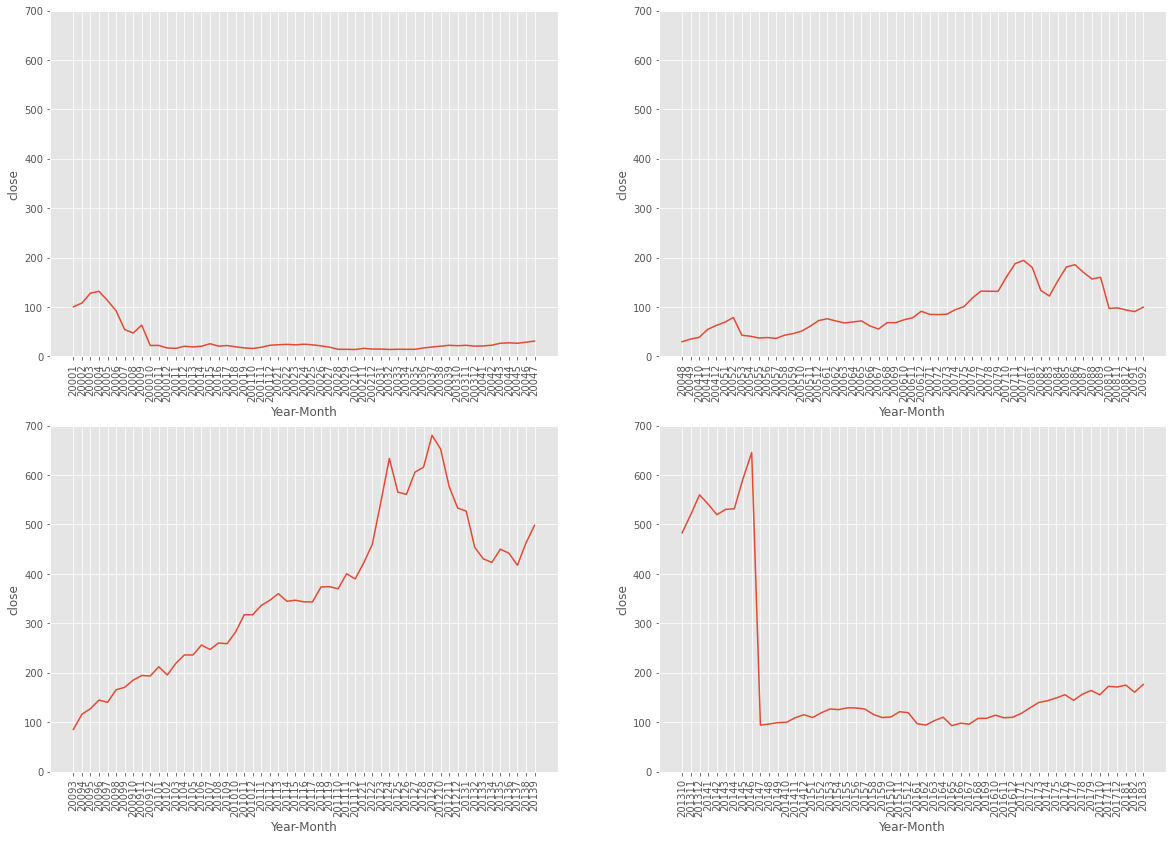

In [18]:
get_scatterplot(stock_agg,"close",[0,700])

In [19]:
idx = stock_agg.index[(stock_agg.year==2014) & (stock_agg.month==6)].tolist()[0]

In [20]:
sad = stock_agg.loc[0:idx,'close']/7
sad = sad.append(stock_agg.loc[idx+1:len(stock_agg),'close'])

In [21]:
stock_agg['close'] = sad

In [22]:
stock_agg[(stock_agg.year<=2014)].tail(10)

,year,month,close,volume,yrmo
170,2014,3,75.777143,39435800,20143
171,2014,4,75.974286,35265900,20144
172,2014,5,84.654286,67823800,20145
173,2014,6,92.224286,58974500,20146
174,2014,7,94.030000,139168800,20147
175,2014,8,96.130000,236825000,20148
176,2014,9,98.970000,322672500,20149
177,2014,10,99.620000,247749150,201410
178,2014,11,109.010000,199952812,201411
179,2014,12,115.000000,266701088,201412


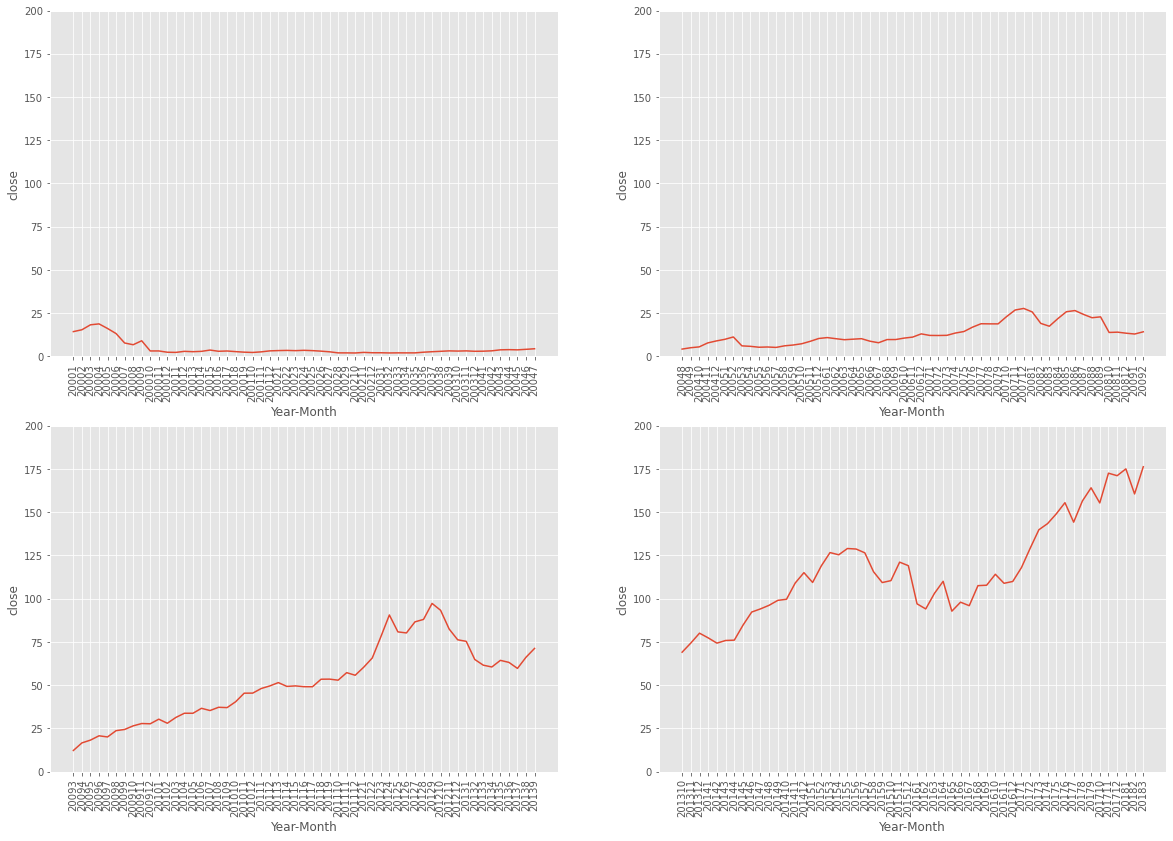

In [23]:
get_scatterplot(stock_agg,"close", [0,200])

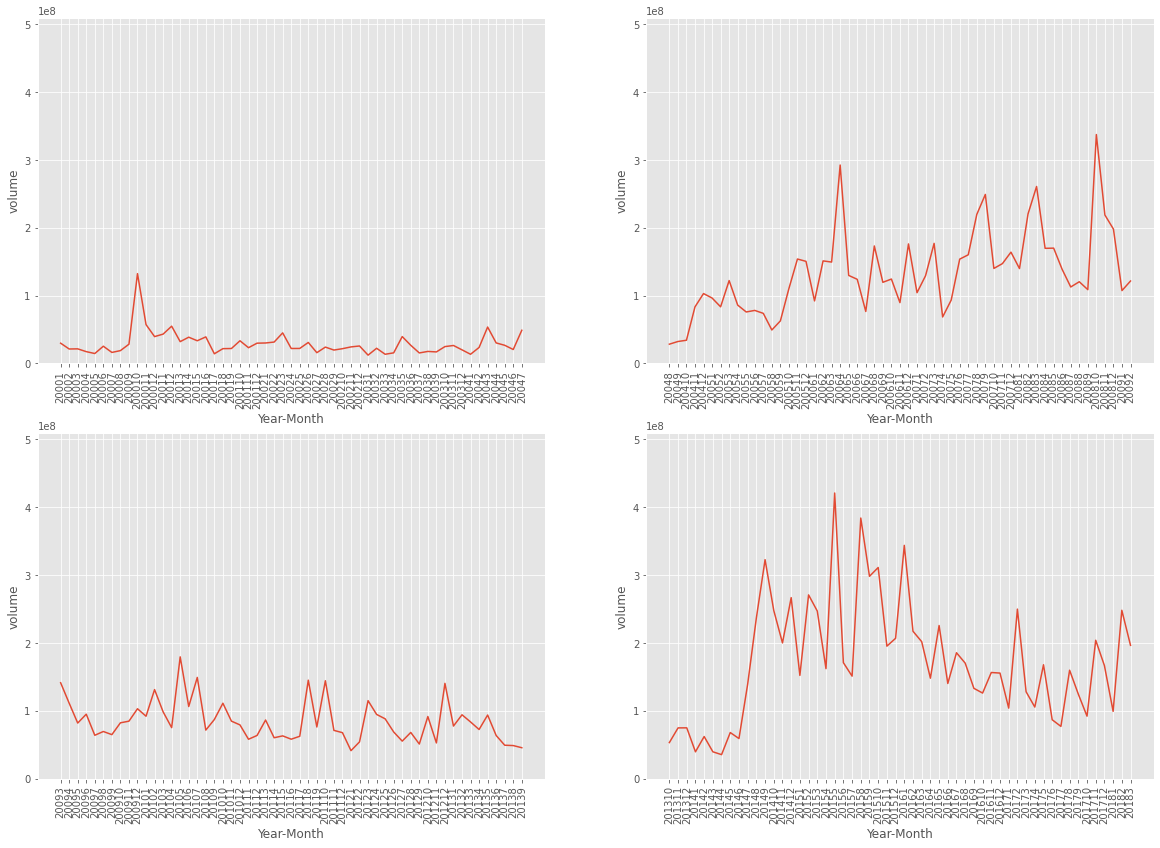

In [24]:
get_scatterplot(stock_agg,"volume",[0,510000000])

In [25]:
sav = stock_agg.loc[0:idx,'volume']*7
sav = sav.append(stock_agg.loc[idx+1:len(stock_agg),'volume'])

In [26]:
stock_agg['volume'] = sav

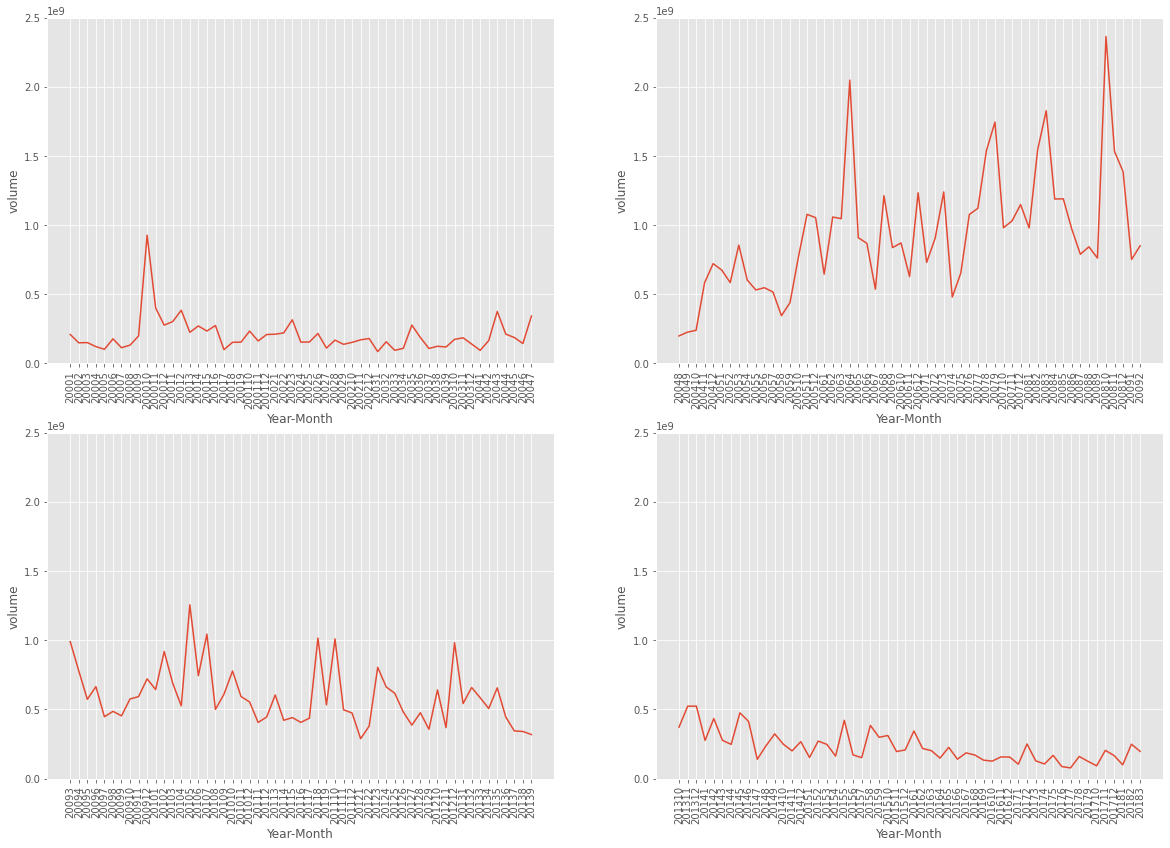

In [27]:
get_scatterplot(stock_agg,"volume",[0,2500000000])

In [28]:
corr = stock_agg[["close","volume"]].corr()

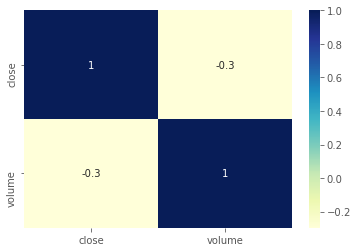

In [29]:
sbn.heatmap(corr, annot=True, cmap="YlGnBu")

In [30]:
for i in range(1,7):
    stock_agg['close_lag' + str(i)] = stock_agg['close'].shift(i)

In [31]:
stock_agg.head()

,year,month,close,volume,yrmo,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6
0,2000,1,14.348571,209108900,20001,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,15.428571,149026500,20002,14.348571,NaN,NaN,NaN,NaN,NaN
2,2000,3,18.285714,150557400,20003,15.428571,14.348571,NaN,NaN,NaN,NaN
3,2000,4,18.821429,121788800,20004,18.285714,15.428571,14.348571,NaN,NaN,NaN
4,2000,5,16.160000,102251100,20005,18.821429,18.285714,15.428571,14.348571,NaN,NaN


In [32]:
import talib

In [33]:
for n in [3,6,9,12]:

    # Create the moving average and divide by the close price to average it out
    stock_agg['ma_' + str(n)] = talib.SMA(stock_agg['close'].values,
                              timeperiod=n) / stock_agg['close']
    # Create the RSI indicator
    stock_agg['rsi_' + str(n)] = talib.RSI(stock_agg['close'].values, timeperiod=n)
stock_agg.head(10)

,year,month,close,volume,yrmo,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12
0,2000,1,14.348571,209108900,20001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,15.428571,149026500,20002,14.348571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3,18.285714,150557400,20003,15.428571,14.348571,NaN,NaN,NaN,NaN,0.876146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,4,18.821429,121788800,20004,18.285714,15.428571,14.348571,NaN,NaN,NaN,0.930424,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,5,16.160000,102251100,20005,18.821429,18.285714,15.428571,14.348571,NaN,NaN,1.098745,52.839423,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,6,13.222857,177703400,20006,16.160000,18.821429,18.285714,15.428571,14.348571,NaN,1.215176,29.673506,1.213393,NaN,NaN,NaN,NaN,NaN
6,2000,7,7.777143,113649200,20007,13.222857,16.160000,18.821429,18.285714,15.428571,14.348571,1.592701,13.370628,1.922208,28.825262,NaN,NaN,NaN,NaN
7,2000,8,6.768571,132244700,20008,7.777143,13.222857,16.160000,18.821429,18.285714,15.428571,1.367525,11.600109,1.995392,26.739658,NaN,NaN,NaN,NaN
8,2000,9,9.062857,198487100,20009,6.768571,7.777143,13.222857,16.160000,18.821429,18.285714,0.868327,39.111656,1.320644,38.822580,1.469683,NaN,NaN,NaN
9,2000,10,3.170000,926824500,200010,9.062857,6.768571,7.777143,13.222857,16.160000,18.821429,1.998047,17.785803,2.952756,25.738445,3.809924,27.383086,NaN,NaN


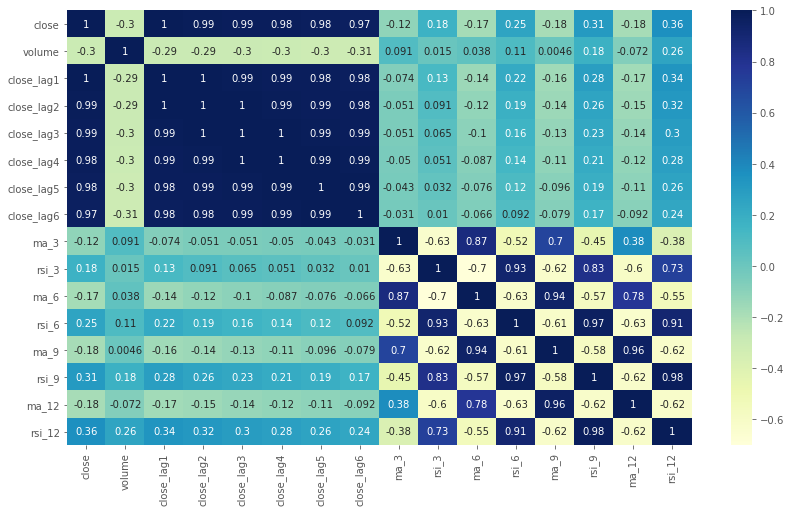

In [34]:
plt.figure(figsize=(14,8))
corr = stock_agg.drop(columns=["year","month","yrmo"]).corr()
sbn.heatmap(data=corr, annot=True, cmap="YlGnBu")

In [35]:
stock_agg.isna().sum()

year           0
month          0
close          0
volume         0
yrmo           0
close_lag1     1
close_lag2     2
close_lag3     3
close_lag4     4
close_lag5     5
close_lag6     6
ma_3           2
rsi_3          3
ma_6           5
rsi_6          6
ma_9           8
rsi_9          9
ma_12         11
rsi_12        12
dtype: int64

In [36]:
stock_agg.dropna(inplace=True)
len(stock_agg)

207

In [37]:
stock_agg.isna().sum()

year          0
month         0
close         0
volume        0
yrmo          0
close_lag1    0
close_lag2    0
close_lag3    0
close_lag4    0
close_lag5    0
close_lag6    0
ma_3          0
rsi_3         0
ma_6          0
rsi_6         0
ma_9          0
rsi_9         0
ma_12         0
rsi_12        0
dtype: int64

In [38]:
# Computing IQR
Q1 = stock_agg[["close","volume"]].quantile(0.25)
Q3 = stock_agg[["close","volume"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

close     7.715500e+01
volume    4.739815e+08
dtype: float64


In [39]:
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('ggplot')

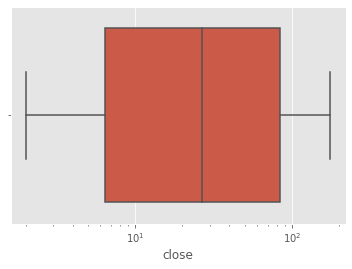

In [40]:
sbn.boxplot("close", data=stock_agg)
plt.xscale("log")

In [41]:
len(stock_agg[stock_agg.close>Q3['close']+1.5*IQR[0]]) * 100/len(stock_agg)

0.0

In [42]:
len(stock_agg[stock_agg.close<Q1['close']-1.5*IQR[0]]) * 100/len(stock_agg)

0.0

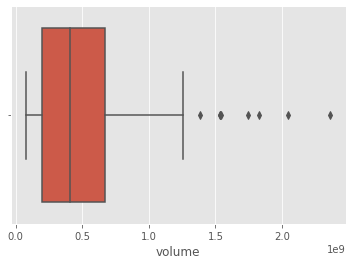

In [43]:
sbn.boxplot("volume", data=stock_agg)

In [44]:
len(stock_agg[stock_agg.volume>Q3['volume'] + 1.5*IQR[1]]) * 100/len(stock_agg)

3.864734299516908

In [45]:
stock_agg = stock_agg[stock_agg.volume < stock_agg.volume.quantile(.95)]

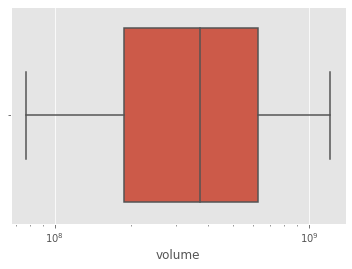

In [46]:
sbn.boxplot("volume", data=stock_agg)
plt.xscale("log")

In [47]:
len(stock_agg[stock_agg.volume>Q3['volume'] + 1.5*IQR[1]]) * 100/len(stock_agg)

0.0

In [48]:
stock_agg.head()

,year,month,close,volume,yrmo,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12
12,2001,1,2.338571,302642200,20011,2.437143,3.178571,3.170000,9.062857,6.768571,7.777143,1.133781,15.092585,1.921095,24.078293,3.046291,26.265370,4.156791,26.507573
13,2001,2,2.945714,384461700,20012,2.338571,2.437143,3.178571,3.170000,9.062857,6.768571,0.873747,31.511451,1.308843,28.859313,1.919981,28.943696,2.946896,28.363782
14,2001,3,2.750000,224981400,20013,2.945714,2.338571,2.437143,3.178571,3.170000,9.062857,0.973853,28.817006,1.019394,28.173033,1.633478,28.567385,2.685844,28.114077
15,2001,4,2.941429,270841900,20014,2.750000,2.945714,2.338571,2.437143,3.178571,3.170000,0.978792,36.751619,0.940100,30.123383,1.344504,29.574912,2.061154,28.783068
16,2001,5,3.678571,234143700,20015,2.941429,2.750000,2.945714,2.338571,2.437143,3.178571,0.849061,61.524273,0.774369,37.913568,0.981748,33.630256,1.365372,31.462473


In [49]:
import requests, bs4

In [50]:
req = requests.get("https://en.wikipedia.org/wiki/List_of_Apple_Inc._media_events")
soup = bs4.BeautifulSoup(req.text, "html.parser")
spans = soup.find_all('span', attrs={'class':'toctext'})
for span in spans[0:5]:
    print(span.text)

Venues
2005
WWDC 2005 (June 6–10, 2005)
2006
Apple Special Event (February 28, 2006)


In [51]:
import calendar
months = list(calendar.month_name)[1:]

In [52]:
events = []
for span in spans:
    stxt = span.text
    for i, month in enumerate(months):
        if month in stxt:
            yr = stxt[-5:-1]
            events.append(yr+str(i+1))
print(events)

['20056', '20062', '20068', '20069', '20071', '20081', '20086', '20089', '20096', '20101', '20104', '20106', '20109', '20113', '20116', '201110', '20123', '20126', '20129', '201210', '20136', '20139', '201310', '20146', '20149', '201410', '20153', '20156', '20159', '20163', '20166', '20169', '201610', '20176', '20179', '20183', '20186', '20189', '201810', '20193', '20196', '20199', '201912', '20206', '20209', '202010', '202011', '20214', '20216']


In [53]:
stock_agg['event'] = stock_agg['yrmo'].apply(lambda ymo : 1 if ymo in events else 0)
stock_agg[['yrmo','event']].tail(7)

,yrmo,event
212,20179,1
213,201710,0
214,201711,0
215,201712,0
216,20181,0
217,20182,0
218,20183,1


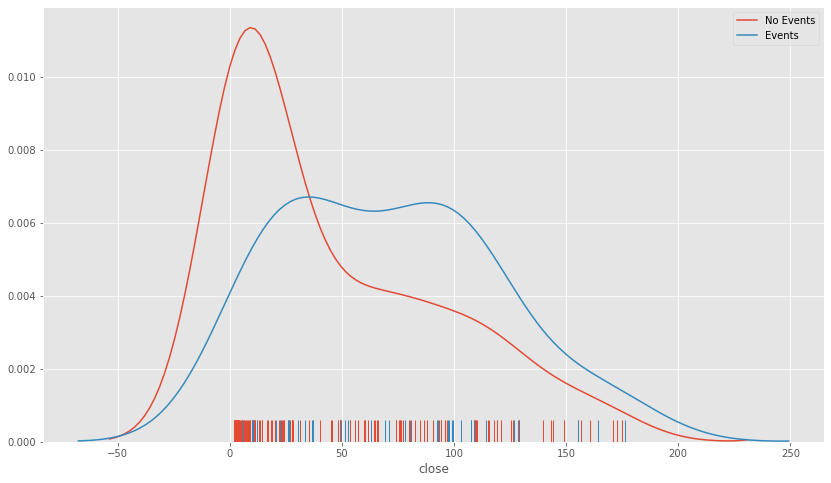

In [54]:
plt.figure(figsize=(14,8))
sbn.distplot(stock_agg.loc[stock_agg.event==0,'close'], hist=False, rug=True,label='No Events')
sbn.distplot(stock_agg.loc[stock_agg.event==1,'close'], hist=False, rug=True, label='Events')
plt.show()

In [55]:
print("Event Mean ",stock_agg.loc[stock_agg.event==1,:]['close'].mean())
print("Non Event Mean ",stock_agg.loc[stock_agg.event==0,:]['close'].mean())

Event Mean  71.09878174603176
Non Event Mean  45.32377758928572


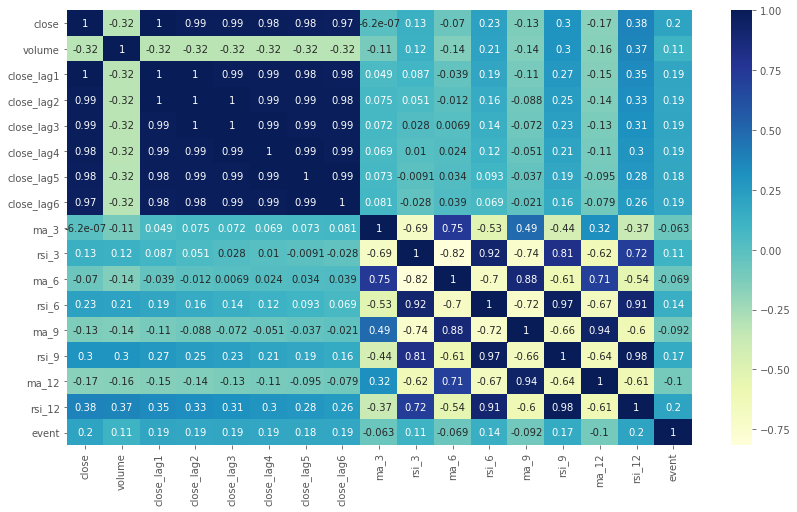

In [56]:
plt.figure(figsize=(14,8))
corr = stock_agg.drop(columns=["year","month","yrmo"]).corr()
sbn.heatmap(data=corr, annot=True, cmap="YlGnBu")

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
stock_final = stock_agg.drop(columns = ["year","month","yrmo"], axis = 1)

In [59]:
stock_final.head()

,close,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event
12,2.338571,302642200,2.437143,3.178571,3.170000,9.062857,6.768571,7.777143,1.133781,15.092585,1.921095,24.078293,3.046291,26.265370,4.156791,26.507573,0
13,2.945714,384461700,2.338571,2.437143,3.178571,3.170000,9.062857,6.768571,0.873747,31.511451,1.308843,28.859313,1.919981,28.943696,2.946896,28.363782,0
14,2.750000,224981400,2.945714,2.338571,2.437143,3.178571,3.170000,9.062857,0.973853,28.817006,1.019394,28.173033,1.633478,28.567385,2.685844,28.114077,0
15,2.941429,270841900,2.750000,2.945714,2.338571,2.437143,3.178571,3.170000,0.978792,36.751619,0.940100,30.123383,1.344504,29.574912,2.061154,28.783068,0
16,3.678571,234143700,2.941429,2.750000,2.945714,2.338571,2.437143,3.178571,0.849061,61.524273,0.774369,37.913568,0.981748,33.630256,1.365372,31.462473,0


In [60]:
stock_n = stock_final.loc[:, stock_final.columns != 'close']

In [61]:
stock_n = (stock_n - stock_n.mean()) / stock_n.std()

In [62]:
stock_m = pd.concat([stock_n,stock_final.loc[:,'close']],axis=1)

In [63]:
stock_m.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
12,-0.472011,-0.963632,-0.940420,-0.936495,-0.807920,-0.856290,-0.830189,1.835873,-1.864310,6.123602,-1.888979,8.547623,-1.938234,8.754225,-1.968746,-0.47313,2.338571
13,-0.197822,-0.965667,-0.955899,-0.936313,-0.935017,-0.805886,-0.852659,-1.296160,-1.248793,2.197776,-1.657659,3.925119,-1.790431,5.429749,-1.858903,-0.47313,2.945714
14,-0.732264,-0.953127,-0.957957,-0.952038,-0.934833,-0.935348,-0.801544,-0.090417,-1.349804,0.341803,-1.690864,2.749278,-1.811198,4.712446,-1.873680,-0.47313,2.750000
15,-0.578579,-0.957170,-0.945282,-0.954129,-0.950824,-0.935160,-0.932833,-0.030923,-1.052348,-0.166636,-1.596500,1.563297,-1.755597,2.995961,-1.834092,-0.47313,2.941429
16,-0.701560,-0.953216,-0.949368,-0.941252,-0.952950,-0.951449,-0.932642,-1.593491,-0.123660,-1.229322,-1.219587,0.074504,-1.531803,1.084133,-1.675536,-0.47313,3.678571


In [64]:
stock_m.to_csv("apple_stock_prepared.csv",index=False)

In [65]:
X = stock_m.loc[:, stock_m.columns != 'close']
Y = stock_m['close']

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42, test_size=0.2)

In [67]:
print("Length Of training data ", len(X_train))
print("Length Of test data ", len(X_test))
print("Length Of training Y ", len(Y_train))
print("Length Of test data Y", len(Y_test))

Length Of training data  156
Length Of test data  40
Length Of training Y  156
Length Of test data Y 40
